# Pandas_Introduction5
Im creating these series for people that have beginner/intermediate knowledge about pandas library.I m going to share my working notes(after tidying) to pass the info,nothing more. Certain codeblocks could get repetitive. Some info looks contradictory even though i have tried to remove most of them. Sorry for it beforehand. Also goodluck on your learning journey. This is my first kernel as well. Wish me luck. Contact me for any question, i will help you out if i can.

Contents:
* [Work with Dates & Times](#1)
* [Handling Duplicate Values](#2)
* [Display Options in Pandas](#3)
* [Creating Pandas DataFrame](#4)


<a id="1"></a> 
## Work with Dates & Times

In [1]:
import pandas as pd
ufo=pd.read_csv("../input/ufo.csv")

In [2]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [3]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [4]:
#lets slice the string hour part of time variable, we only want to analyze that part.
#starting from 5th element from the end to the 3th element to the end
ufo.Time.str.slice(-5,-3)

0        22
1        20
2        14
3        13
4        19
5        15
6         0
7         0
8        17
9         0
10       21
11       20
12       20
13        2
14       13
15       11
16        0
17       22
18        1
19       23
20       15
21        0
22        0
23       11
24       10
25       12
26       12
27       11
28       12
29       10
         ..
18211    18
18212    18
18213    19
18214     0
18215     9
18216    16
18217    19
18218    20
18219    20
18220    20
18221    20
18222    21
18223    22
18224    23
18225    10
18226    22
18227    22
18228     4
18229    11
18230    20
18231    20
18232    20
18233    21
18234    22
18235    23
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: object

In [5]:
#convert it to int for math purposes if necessary.but this approach is pretty brittle.ez to cause error.
ufo.Time.str.slice(-5,-3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [6]:
#lets convert object to date
ufo["Time"]=pd.to_datetime(ufo.Time)

In [7]:
#we dont have to specify m/d/y format. program auto recognize it but what if it doesnt? Coming soon..
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [8]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [9]:
#to get an hour
ufo.Time.dt.hour

0        22
1        20
2        14
3        13
4        19
5        15
6         0
7         0
8        17
9         0
10       21
11       20
12       20
13        2
14       13
15       11
16        0
17       22
18        1
19       23
20       15
21        0
22        0
23       11
24       10
25       12
26       12
27       11
28       12
29       10
         ..
18211    18
18212    18
18213    19
18214     0
18215     9
18216    16
18217    19
18218    20
18219    20
18220    20
18221    20
18222    21
18223    22
18224    23
18225    10
18226    22
18227    22
18228     4
18229    11
18230    20
18231    20
18232    20
18233    21
18234    22
18235    23
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [10]:
#learn day of the week
ufo.Time.dt.weekday_name

0           Sunday
1           Monday
2           Sunday
3           Monday
4          Tuesday
5         Saturday
6         Saturday
7        Wednesday
8         Thursday
9          Tuesday
10          Sunday
11        Thursday
12          Friday
13          Friday
14          Sunday
15       Wednesday
16       Wednesday
17          Monday
18       Wednesday
19          Friday
20         Tuesday
21          Sunday
22          Sunday
23          Friday
24        Saturday
25        Saturday
26        Saturday
27          Sunday
28        Thursday
29          Friday
           ...    
18211     Thursday
18212     Thursday
18213     Thursday
18214       Friday
18215       Friday
18216       Friday
18217       Friday
18218       Friday
18219       Friday
18220       Friday
18221       Friday
18222       Friday
18223       Friday
18224       Friday
18225     Saturday
18226     Saturday
18227     Saturday
18228       Sunday
18229       Sunday
18230       Sunday
18231       Sunday
18232       

In [11]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [12]:
#to learn more about date attributes and methods. go to api reference and search for .dt.
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html

In [13]:
#lets work around to_datetime from pandas to learn more
ts=pd.to_datetime("1/1/1999")
ts
#it outputs a timestamp u can learn more about it.we use this timestamp as filter now.

Timestamp('1999-01-01 00:00:00')

In [14]:
#here as u can see we use ts as a filter.
ufo.loc[ufo.Time>=ts,:].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [15]:
#math operations w datetime format.result is ts object for this ex.
ufo.Time.max()

Timestamp('2000-12-31 23:59:00')

In [16]:
#result is a timedelta object this time which has many attributes as well.
ufo.Time.max()-ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [17]:
#many possibilites we just showing you the basics.
(ufo.Time.max()-ufo.Time.min()).days

25781

In [18]:
#bonus tips-plotting time
%matplotlib inline
import pandas as pd
#first we only want to see year values on time col
ufo=pd.read_csv("../input/ufo.csv")
ufo["Time"]=pd.to_datetime(ufo.Time)
ufo["Time"]=ufo.Time.dt.year
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930
1,Willingboro,NaN,OTHER,NJ,1930
2,Holyoke,NaN,OVAL,CO,1931
3,Abilene,NaN,DISK,KS,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933


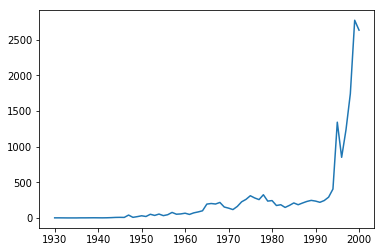

In [19]:
#sort_index sort the data via index value not by its col value (alphabetical or numerical)
ufo.Time.value_counts().sort_index().plot()
#ufo sightings each year.

<a id="2"></a> 
## Handling Duplicate Values

In [20]:
# read a dataset of movie reviewers into a DataFrame
import pandas as pd
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('../input/u.user', sep='|', header=None, names=user_cols, index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [21]:
users.shape

(943, 4)

In [22]:
#lets find duplicate values in zipcode col
users.zip_code.duplicated()
#returns a boolean t/f if its t then ENTRIES above that value has duplicate of our value.row 29 is true which means btw 0-28
#that value has a duplicate.

user_id
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29      True
30     False
       ...  
914    False
915    False
916    False
917    False
918    False
919     True
920    False
921    False
922     True
923    False
924    False
925    False
926    False
927    False
928     True
929     True
930    False
931    False
932    False
933    False
934     True
935    False
936    False
937     True
938    False
939    False
940     True
941    False
942    False
943    False
Name: zip_code, Length: 943, dtype: bool

In [23]:
#number of duplicate values regardless of their place
users.zip_code.duplicated().sum()

148

In [24]:
#now we look it on df level. true means that, indexes above that index has whole same row.
users.duplicated()

user_id
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
       ...  
914    False
915    False
916    False
917    False
918    False
919    False
920    False
921    False
922    False
923    False
924    False
925    False
926    False
927    False
928    False
929    False
930    False
931    False
932    False
933    False
934    False
935    False
936    False
937    False
938    False
939    False
940    False
941    False
942    False
943    False
Length: 943, dtype: bool

In [25]:
#we want to see what is this rows? where are they? what are they?
users.duplicated().sum()

7

In [26]:
#lets see all true values first.duplicated() has keep="first" as a default arg.
users.loc[users.duplicated(),:]
#keep="first" means keep the first time it returns true then dont keep the others.Ex: if same data is on row 2-20-200 then it
#shows first time duplicated() returns true which is 20 and doesnt show the 200. (as i understand it) lets change it.

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [27]:
users.loc[users.duplicated(keep="last"),:]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630


In [28]:
#shows all duplicate values with their duplicated counterparts
users.loc[users.duplicated(keep=False),:]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [29]:
#lets learn how to drop them.keep=first by default.we have 943 rows by default now its 936.
users.drop_duplicates(keep="first").shape

(936, 4)

In [30]:
#now its 14.
users.drop_duplicates(keep=False).shape

(929, 4)

In [31]:
#bonus tips
#we think age and zipcode is unique identifier that gives us an info about if they are duplicate or not, rather than all rows 
users.duplicated(subset=["age","zip_code"]).sum()
#there are 16 duplicates with age/zipcode criteria
#u can drop them with same methods if u want.

16

<a id="3"></a> 
## Display Options in Pandas

In [32]:
import pandas as pd

In [33]:
drinks=pd.read_csv("../input/drinks.csv")

In [34]:
#it prints first 30 rows and last 30 rows so lets learn how to change this display options.
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [35]:
#pandas.get_option documentation
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_option.html
#search display.max_rows

In [36]:
#30-30
pd.get_option("display.max_rows")

60

In [37]:
#None=show all rows
pd.set_option("display.max_rows",None)

In [38]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [39]:
#reset or change it back the option
pd.reset_option("display.max_rows")

In [40]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [41]:
#for columns
pd.get_option("display.max_columns")

0

In [42]:
train=pd.read_csv("../input/titanic_train.csv")
train.head()
#if u look to the name col's data, some names have ellipsis(...) lets set max letter visibility.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
#we set it up
pd.set_option("display.max_colwidth",1000)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
#lets set decimal point boundaries.4 decimal points is too much
pd.get_option("display.precision")

6

In [45]:
#these changes doesnt change the underlying data.just changes the way it is showed/displayed.
pd.set_option("display.precision",2)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [46]:
#how to format large numbers
drinks["x"]=drinks.wine_servings*1000

In [47]:
drinks["y"]=drinks.total_litres_of_pure_alcohol*1000

In [48]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,x,y
0,Afghanistan,0,0,0,0.0,Asia,0,0.0
1,Albania,89,132,54,4.9,Europe,54000,4900.0
2,Algeria,25,0,14,0.7,Africa,14000,700.0
3,Andorra,245,138,312,12.4,Europe,312000,12400.0
4,Angola,217,57,45,5.9,Africa,45000,5900.0


In [49]:
#formating float data
pd.set_option("display.float_format","{:,}".format)

In [50]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,x,y
0,Afghanistan,0,0,0,0.0,Asia,0,0.0
1,Albania,89,132,54,4.9,Europe,54000,"4,900.0"
2,Algeria,25,0,14,0.7,Africa,14000,700.0
3,Andorra,245,138,312,12.4,Europe,312000,"12,400.0"
4,Angola,217,57,45,5.9,Africa,45000,"5,900.0"


In [51]:
#bonus tips
#u want to read pandas options but dont have an internet.
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]

compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]

display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]

display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]

display.column_space No description available.
    [default: 12] [currently: 12]

display.date_dayfirst : boolean
    When True, prints and parses dates with the day first, eg 20/01/2005
    [default: False] [currently: False]

display.date_year

In [52]:
#just options that has "rows" in them
pd.describe_option("rows")

display.max_info_rows : int or None
    df.info() will usually show null-counts for each column.
    For large frames this can be quite slow. max_info_rows and max_info_cols
    limit this null check only to frames with smaller dimensions than
    specified.
    [default: 1690785] [currently: 1690785]

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 60]




In [53]:
#to reset all options
pd.reset_option("all")

html.border has been deprecated, use display.html.border instead
(currently both are identical)


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/opt/conda/lib/python3.6/site-packages/pandas/core/config.py:619: FutureWarning: html.border has been deprecated, use display.html.border instead
(currently both are identical)

  warnings.warn(d.msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/pandas/core/config.py:619: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


<a id="4"></a> 
## Creating Pandas DataFrame

In [54]:
import pandas as pd

In [55]:
#easy way to create df: using dictionary as a constructor however order cant be forced which is a problem
#old way-using dictionary as a constructor to construct a df
pd.DataFrame({"id":[100,101,102],"color":["red","blue","red"]})
#dictionary is an unordered data structure.lets set up their order.

,id,color
0,100,red
1,101,blue
2,102,red


In [56]:
#set up their order.
pd.DataFrame({"id":[100,101,102],"color":["red","blue","red"]},columns=["color","id"])

,color,id
0,red,100
1,blue,101
2,red,102


In [57]:
#u can also set up their indices
pd.DataFrame({"id":[100,101,102],"color":["red","blue","red"]},columns=["color","id"],index=["a","b","c"])

,color,id
a,red,100
b,blue,101
c,red,102


In [58]:
#creating df as passing list of lists-each list considered as row. so mentality is different than dict method
pd.DataFrame([[100,"red"],[101,"blue"],[102,"red"]])

,0,1
0,100,red
1,101,blue
2,102,red


In [59]:
#giving colnames
df=pd.DataFrame([[100,"red"],[101,"blue"],[102,"red"]],columns=["id","color"])
df

,id,color
0,100,red
1,101,blue
2,102,red


In [60]:
import numpy as np

In [61]:
#documentation
#https://docs.scipy.org/doc/numpy/reference/routines.random.html
arr=np.random.rand(4,2)
arr

array([[0.53574573, 0.51751143],
       [0.98026792, 0.76659132],
       [0.36345451, 0.99263766],
       [0.14917823, 0.46935806]])

In [62]:
#we can just use this array to create df
round(pd.DataFrame(arr,columns=["one","two"]),5)
#i need to set an option about this decimal places. 8 decimal place is very unnecessary and rounding takes time

,one,two
0,0.53575,0.51751
1,0.98027,0.76659
2,0.36345,0.99264
3,0.14918,0.46936


In [63]:
#arange documentation
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html
#using dict as constructor.each key/pair creates one col by default. randint(60,101,10) -> from 60 to 101 create 10 values.
pd.DataFrame({"student":np.arange(100,110,1),"test":np.random.randint(60,101,10)})

,student,test
0,100,88
1,101,81
2,102,63
3,103,97
4,104,83
5,105,81
6,106,71
7,107,92
8,108,76
9,109,64


In [64]:
#bonus tips.
#if u want to set one col as an index u can do it with chaining set_index() to the very end
pd.DataFrame({"student":np.arange(100,110,1),"test":np.random.randint(60,101,10)}).set_index("student")
#result is df not a series.

,test
student,
100,75
101,78
102,83
103,82
104,66
105,96
106,77
107,68
108,80


In [65]:
#create a series and attach it to a new df
s=pd.Series(["round","square"],index=["c","b"],name="shape")
s
#passing list as values,passing list as indexes and give it a name.Names are identifiers of Series.ex is on the way

c     round
b    square
Name: shape, dtype: object

In [66]:
df=pd.DataFrame([[100,"red"],[101,"blue"],[102,"red"]],columns=["id","color"],index=["a","b","c"])

pd.concat([df,s],axis=1)
#series aligned to the dataframe by index that s the reason behind a=nan bcs there is no a index in series.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,id,color,shape
a,100,red,NaN
b,101,blue,square
c,102,red,round
